In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pickle
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from typing import Tuple, List, NewType
import matplotlib.ticker as mtick

Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots(1, 1)
    
    if size != None:
        fig.set_size_inches(size)
    else:
        fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

In [21]:
results = pickle.load(open("simulation_results.pickle", "rb"))

In [4]:
parameters = {'network_size': [1000], 
              'memory_size': [100], 
              'prefferential_att': [2], 
              'code_length': [5], 
              'kappa': [0, 5, 10, 15, 20], 
              'gamma': [-5, -2, 0, 1, 5], 
              'lambda': [0], 
              'alpha': [0], 
              'omega': [0], 
              'T': 100, 
              'num_repetitions': 5, 
              'seed': 42, 
              'path_str': Path('experiments/experiment_4')}

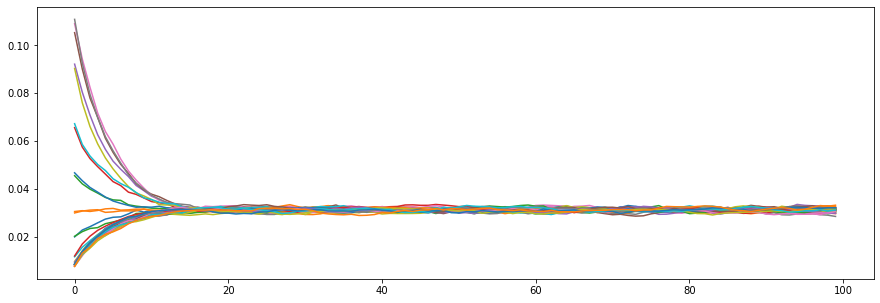

In [52]:
params = (1000, 100, 2, 5, 0, 0, 0, 0, 0)
_results = results[params][0]['Distribution'].T
fig, ax = plt.subplots(figsize = (15, 5))
X = np.arange(_results.shape[1])
for k in range(len(_results)):
    ax.plot(X, _results[k], label = f"Code: {k}")

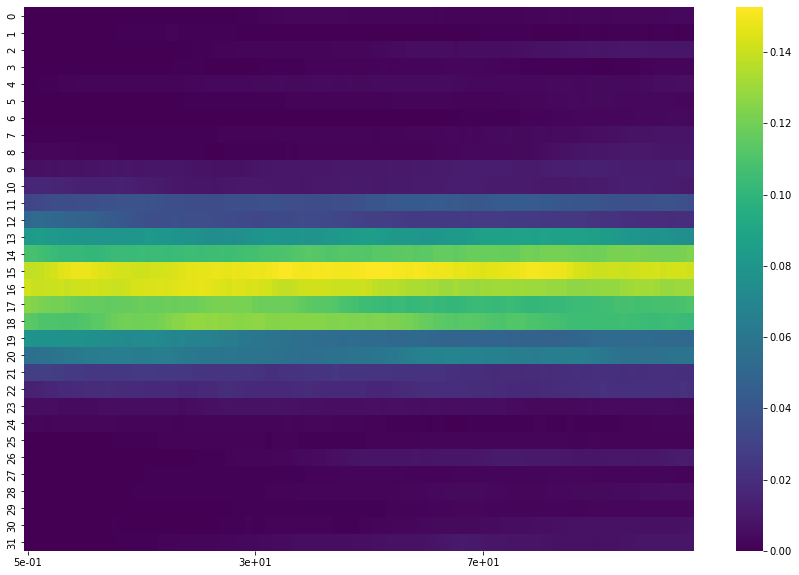

In [51]:
params = (1000, 100, 2, 5, 15, 1, 0, 0, 0)
_results = results[params][0]['Distribution'].T
fig, ax = heat_plot(_results, cmap = 'viridis')